<a href="https://colab.research.google.com/github/danielmaica/fundamentos-de-ia/blob/main/1_Fundamentos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Supervisionado

## Regressão Linear

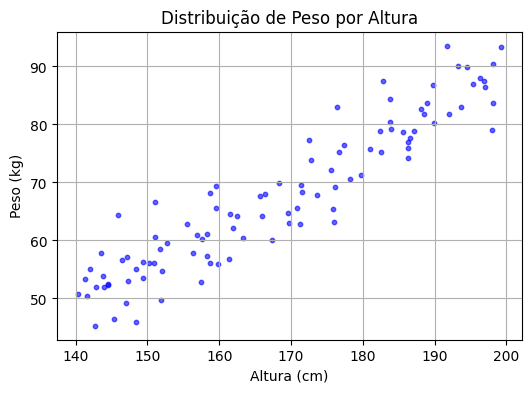

In [ ]:
# Reimportando as bibliotecas após o reset do estado
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerando dados simulados de peso por altura
np.random.seed(42)
altura = np.random.uniform(140, 200, 100)  # Altura em cm (entre 140 cm e 200 cm)
peso = 0.7 * altura - 50 + np.random.normal(0, 5, size=altura.shape)  # Peso em kg com ruído

# Criando scatter plot da distribuição real
plt.figure(figsize=(6, 4))
plt.scatter(altura, peso, alpha=0.6, color='blue', s=10)
plt.title("Distribuição de Peso por Altura")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.grid(True)
plt.show()

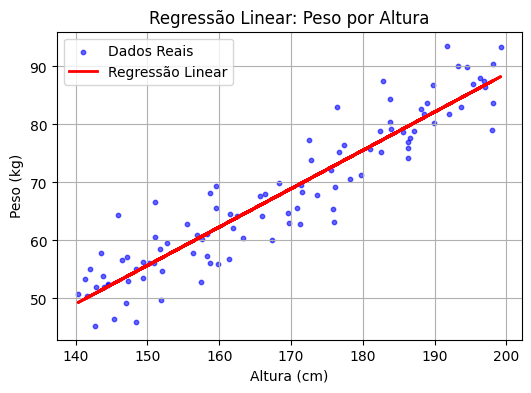

In [ ]:
# Transformando os dados para o formato adequado ao scikit-learn
altura = altura.reshape(-1, 1)  # Transformando para matriz 2D

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(altura, peso)

# Predição dos pesos ajustados pelo modelo
peso_pred = modelo.predict(altura)

# Criando o plot com a reta ajustada
plt.figure(figsize=(6, 4))
plt.scatter(altura, peso, alpha=0.6, color='blue', s=10, label="Dados Reais")
plt.plot(altura, peso_pred, color='red', linewidth=2, label="Regressão Linear")
plt.title("Regressão Linear: Peso por Altura")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
modelo.predict(np.array([182]).reshape(-1, 1))

array([76.86627449])

## Regressão Logística

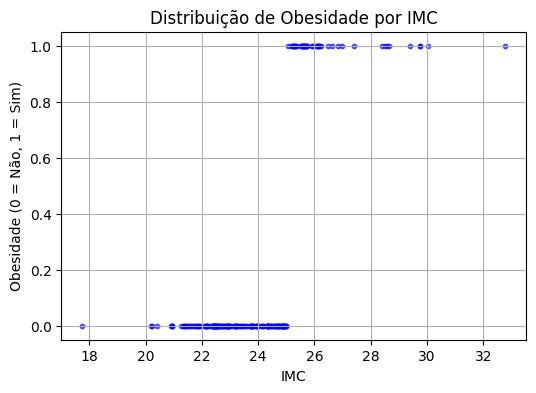

In [ ]:
from sklearn.linear_model import LogisticRegression

# Gerando dados simulados para classificação binária (Exemplo: Obesidade com base no IMC)
np.random.seed(42)
altura = np.random.uniform(140, 200, 200)  # Altura em cm
peso = 0.7 * altura - 50 + np.random.normal(0, 5, size=altura.shape)  # Peso em kg

# Calculando o IMC
imc = peso / (altura / 100) ** 2

# Criando rótulos binários (0 = não obeso, 1 = obeso) usando um limiar de IMC >= 25
obesidade = (imc >= 25).astype(int)

# Criando scatter plot da distribuição dos dados
plt.figure(figsize=(6, 4))
plt.scatter(imc, obesidade, alpha=0.6, color='blue', s=10)
plt.title("Distribuição de Obesidade por IMC")
plt.xlabel("IMC")
plt.ylabel("Obesidade (0 = Não, 1 = Sim)")
plt.grid(True)
plt.show()

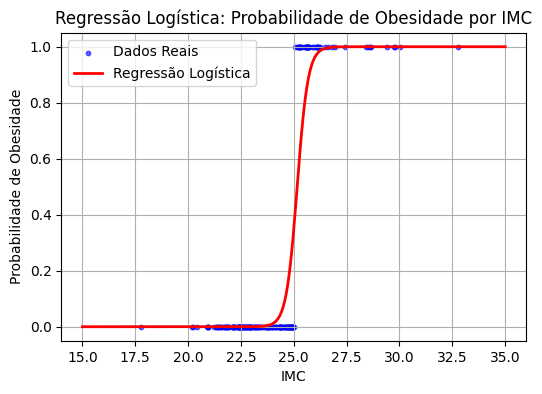

In [ ]:
# Transformando os dados para o formato adequado ao scikit-learn
imc = imc.reshape(-1, 1)  # Transformando para matriz 2D

# Criando e treinando o modelo de regressão logística
modelo_logistico = LogisticRegression()
modelo_logistico.fit(imc, obesidade)

# Criando valores de IMC para prever a probabilidade de obesidade
imc_range = np.linspace(15, 35, 300).reshape(-1, 1)
prob_obesidade = modelo_logistico.predict_proba(imc_range)[:, 1]  # Probabilidade de obesidade

# Criando o plot com a curva sigmoidal ajustada
plt.figure(figsize=(6, 4))
plt.scatter(imc, obesidade, alpha=0.6, color='blue', s=10, label="Dados Reais")
plt.plot(imc_range, prob_obesidade, color='red', linewidth=2, label="Regressão Logística")
plt.title("Regressão Logística: Probabilidade de Obesidade por IMC")
plt.xlabel("IMC")
plt.ylabel("Probabilidade de Obesidade")
plt.legend()
plt.grid(True)
plt.show()

## Redes Neurais

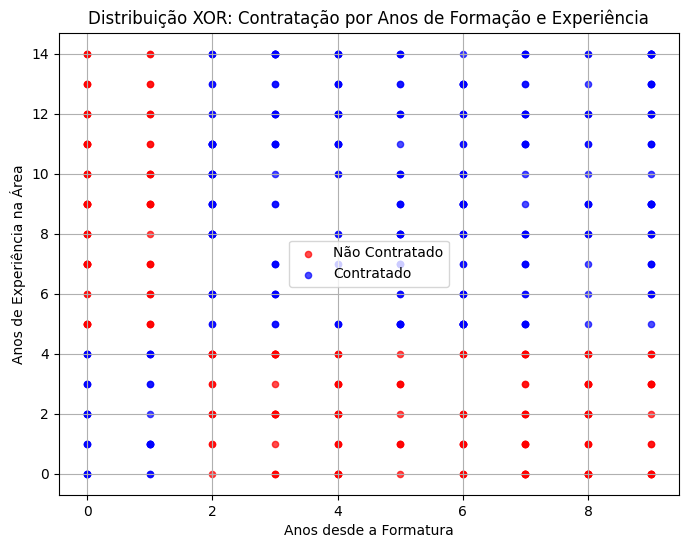

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Semente para reprodutibilidade
np.random.seed(42)
n_samples = 500

# ===========================================
# Gerando dados para o exemplo XOR
# ===========================================
# - tempo_formatura: quantos anos se passaram desde a formatura
# - tempo_experiencia: quantos anos de experiência prática na área

tempo_formatura = np.random.randint(0, 10, n_samples)      # 0 a 9 anos desde formatura
tempo_experiencia = np.random.randint(0, 15, n_samples)    # 0 a 14 anos de experiência

# Lógica XOR:
# A: (tempo_formatura < 2)    -> recém-formado
# B: (tempo_experiencia >= 5) -> autodidata experiente
# Contratado se A XOR B -> (A e não B) ou (B e não A)

contratado = np.logical_xor(tempo_formatura < 2, tempo_experiencia >= 5)
contratado = contratado.astype(int)  # Convertendo para 0 e 1

# ===========================================
# Visualizando a distribuição dos dados
# ===========================================
plt.figure(figsize=(8, 6))
plt.scatter(
    tempo_formatura[contratado == 0],
    tempo_experiencia[contratado == 0],
    color='red', label="Não Contratado", s=20, alpha=0.7
)
plt.scatter(
    tempo_formatura[contratado == 1],
    tempo_experiencia[contratado == 1],
    color='blue', label="Contratado", s=20, alpha=0.7
)
plt.title("Distribuição XOR: Contratação por Anos de Formação e Experiência")
plt.xlabel("Anos desde a Formatura")
plt.ylabel("Anos de Experiência na Área")
plt.legend()
plt.grid(True)
plt.show()

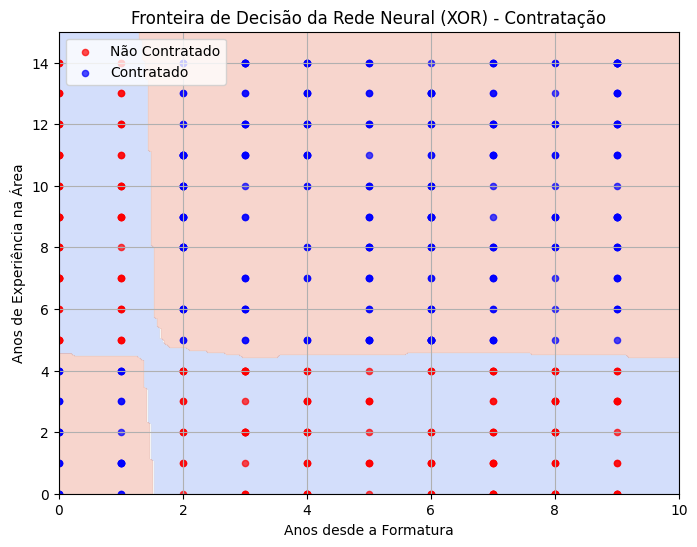

In [ ]:
# Preparando os dados para a rede neural
X = np.column_stack((tempo_formatura, tempo_experiencia))  # Features
y = contratado  # Rótulo (0 ou 1)

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criando e treinando a rede neural
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_scaled, y)

# Criando um grid de pontos para a fronteira
# Vamos analisar de 0 a 10 anos de formatura e 0 a 15 anos de experiência
formatura_range = np.linspace(0, 10, 200)
experiencia_range = np.linspace(0, 15, 200)
xx, yy = np.meshgrid(formatura_range, experiencia_range)
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Aplicando o mesmo scaler ao grid de pontos
X_grid_scaled = scaler.transform(X_grid)

# Prevendo a classe para cada ponto do grid
Z = mlp.predict(X_grid_scaled).reshape(xx.shape)

# Plotando a fronteira de decisão
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm", levels=2)

# Plot dos pontos originais
plt.scatter(
    tempo_formatura[contratado == 0],
    tempo_experiencia[contratado == 0],
    color='red', label="Não Contratado", s=20, alpha=0.7
)
plt.scatter(
    tempo_formatura[contratado == 1],
    tempo_experiencia[contratado == 1],
    color='blue', label="Contratado", s=20, alpha=0.7
)

plt.title("Fronteira de Decisão da Rede Neural (XOR) - Contratação")
plt.xlabel("Anos desde a Formatura")
plt.ylabel("Anos de Experiência na Área")
plt.legend()
plt.grid(True)
plt.show()

# Aprendizado Não Supervisionado

## K-means

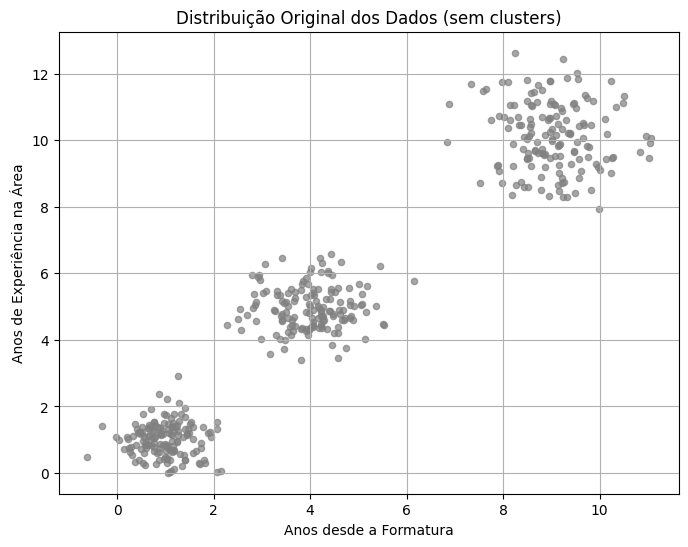

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1) Geração dos dados
np.random.seed(42)
n_samples = 150

# Grupo 1 (Júnior): pouca experiência, recém-formado
grupo1 = np.random.normal(loc=[1, 1], scale=[0.5, 0.5], size=(n_samples, 2))

# Grupo 2 (Pleno): experiência e tempo de formatura intermediários
grupo2 = np.random.normal(loc=[4, 5], scale=[0.7, 0.7], size=(n_samples, 2))

# Grupo 3 (Sênior): experiência alta, formatura há bastante tempo
grupo3 = np.random.normal(loc=[9, 10], scale=[0.8, 1.0], size=(n_samples, 2))

# Empilhando todos os grupos
X = np.vstack([grupo1, grupo2, grupo3])

# 2) Plot da distribuição
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=20, alpha=0.7)
plt.title("Distribuição Original dos Dados (sem clusters)")
plt.xlabel("Anos desde a Formatura")
plt.ylabel("Anos de Experiência na Área")
plt.grid(True)
plt.show()

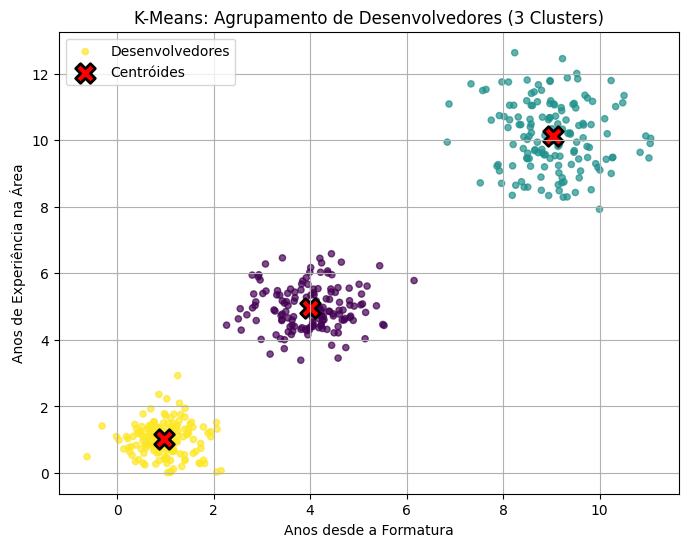

In [ ]:
# 3) Aplicando K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_         # Rótulos atribuídos pelo K-Means
centroids = kmeans.cluster_centers_

# 4) Plot com clusters
plt.figure(figsize=(8, 6))

# Colorindo os dados de acordo com o cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20, alpha=0.7, label="Desenvolvedores")

# Plot dos centróides em vermelho
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', edgecolor='k', s=200, linewidth=2,
            label="Centróides")

plt.title("K-Means: Agrupamento de Desenvolvedores (3 Clusters)")
plt.xlabel("Anos desde a Formatura")
plt.ylabel("Anos de Experiência na Área")
plt.legend()
plt.grid(True)
plt.show()


## PCA

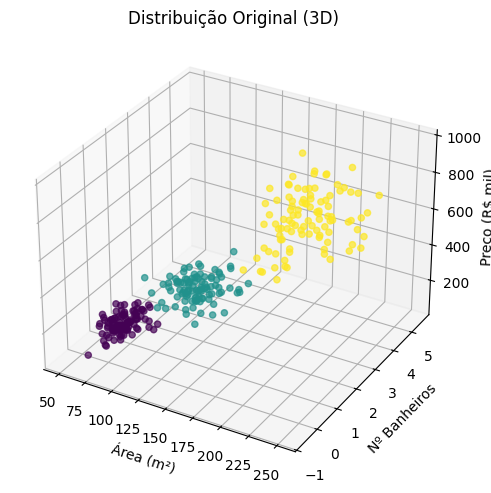

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# =======================
# 1) Geração dos dados
# =======================
np.random.seed(42)
n_samples = 100

# Grupo 1: Zona Popular
zona_popular = np.random.normal(
    loc=[70, 1, 120], scale=[10, 0.5, 20], size=(n_samples, 3)
)
labels_popular = np.array([0]*n_samples)

# Grupo 2: Zona Média
zona_media = np.random.normal(
    loc=[120, 2, 300], scale=[15, 0.5, 50], size=(n_samples, 3)
)
labels_media = np.array([1]*n_samples)

# Grupo 3: Zona Nobre
zona_nobre = np.random.normal(
    loc=[200, 3, 700], scale=[20, 1, 100], size=(n_samples, 3)
)
labels_nobre = np.array([2]*n_samples)

# Empilhando
X = np.vstack([zona_popular, zona_media, zona_nobre])
labels = np.concatenate([labels_popular, labels_media, labels_nobre])

# ============================================
# 2) Plot da distribuição original (3D)
# ============================================
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X[:, 0],  # Área
    X[:, 1],  # Banheiros
    X[:, 2],  # Preço (em milhares)
    c=labels, cmap='viridis', alpha=0.7
)

ax.set_title("Distribuição Original (3D)")
ax.set_xlabel("Área (m²)")
ax.set_ylabel("Nº Banheiros")
ax.set_zlabel("Preço (R$ mil)")

plt.tight_layout()
plt.show()

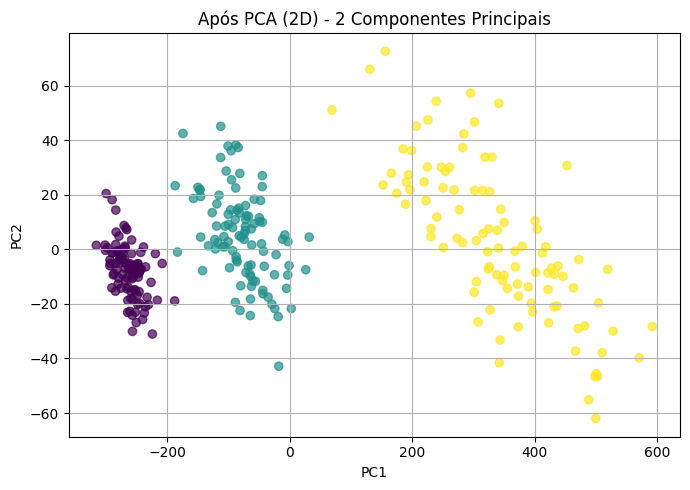

In [ ]:
# =====================
# 3) Aplicando o PCA
# =====================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# =======================
# 4) Plot após o PCA (2D)
# =======================
plt.figure(figsize=(7, 5))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels, cmap='viridis', alpha=0.7
)

plt.title("Após PCA (2D) - 2 Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

## t-SNE

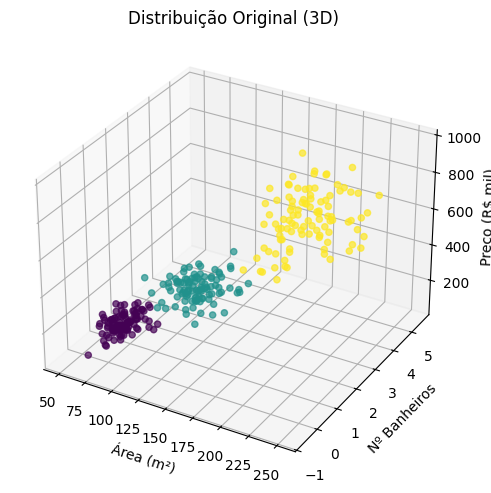

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# ========================
# 1) Geração dos dados
# ========================
np.random.seed(42)
n_samples = 100

# Grupo 1: Zona Popular
zona_popular = np.random.normal(
    loc=[70, 1, 120], scale=[10, 0.5, 20], size=(n_samples, 3)
)
labels_popular = np.array([0]*n_samples)

# Grupo 2: Zona Média
zona_media = np.random.normal(
    loc=[120, 2, 300], scale=[15, 0.5, 50], size=(n_samples, 3)
)
labels_media = np.array([1]*n_samples)

# Grupo 3: Zona Nobre
zona_nobre = np.random.normal(
    loc=[200, 3, 700], scale=[20, 1, 100], size=(n_samples, 3)
)
labels_nobre = np.array([2]*n_samples)

# Empilhando
X = np.vstack([zona_popular, zona_media, zona_nobre])
labels = np.concatenate([labels_popular, labels_media, labels_nobre])

# ============================================
# 2) Plot da distribuição original (3D)
# ============================================
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X[:, 0],  # Área
    X[:, 1],  # Banheiros
    X[:, 2],  # Preço (em milhares)
    c=labels, cmap='viridis', alpha=0.7
)

ax.set_title("Distribuição Original (3D)")
ax.set_xlabel("Área (m²)")
ax.set_ylabel("Nº Banheiros")
ax.set_zlabel("Preço (R$ mil)")
plt.tight_layout()
plt.show()

  warnings.warn(



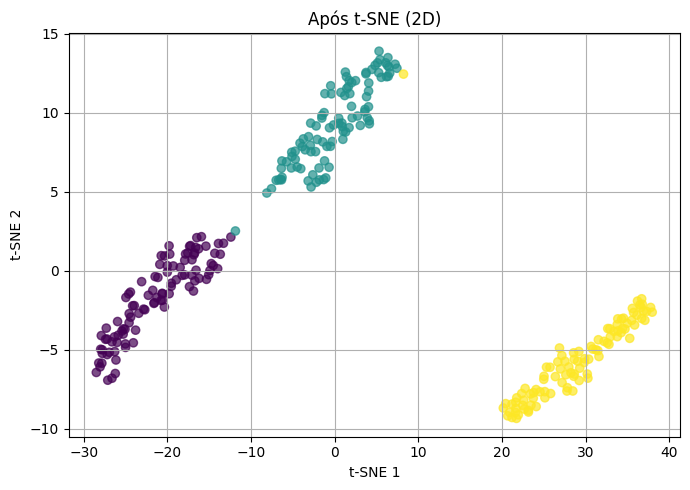

In [ ]:
# ======================
# 3) Aplicando o t-SNE
# ======================
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)  # Reduz de 3D para 2D

# ======================
# 4) Plot após o t-SNE
# ======================
plt.figure(figsize=(7, 5))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=labels, cmap='viridis', alpha=0.7
)
plt.title("Após t-SNE (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Aprendizado Por Reforço

## DQN

In [ ]:
!pip install -U gym==0.26.2 shimmy

In [ ]:
import gym
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import files
from IPython.display import HTML
from base64 import b64encode
import moviepy.editor

# Hyperparameters
GAMMA = 0.99
EPSILON = 1.0
EPSILON_MIN = 0.01
EPSILON_DECAY = 0.995
LEARNING_RATE = 0.001
MEMORY_SIZE = 10000
BATCH_SIZE = 64
TARGET_UPDATE = 10
EPISODES = 100

# Define Q-Network
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Define DQN Agent
class DQNAgent:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.epsilon = EPSILON
        self.memory = deque(maxlen=MEMORY_SIZE)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.policy_net = DQN(state_dim, action_dim).to(self.device)
        self.target_net = DQN(state_dim, action_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()

        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=LEARNING_RATE)

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_dim - 1)
        else:
            state_tensor = torch.FloatTensor(state).to(self.device).unsqueeze(0)
            with torch.no_grad():
                q_values = self.policy_net(state_tensor)
            return torch.argmax(q_values).item()

    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.memory) < BATCH_SIZE:
            return

        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)

        q_values = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        next_q_values = self.target_net(next_states).max(1)[0].detach()
        target_q_values = rewards + GAMMA * next_q_values * (1 - dones)

        loss = F.mse_loss(q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > EPSILON_MIN:
            self.epsilon *= EPSILON_DECAY

    def update_target_network(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

# Train the agent
env = gym.make("CartPole-v1", render_mode='rgb_array')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = DQNAgent(state_dim, action_dim)
scores = []

for episode in range(EPISODES):
    state = env.reset()
    state = state[0]  # Fix for Gym 0.26+
    total_reward = 0
    done = False

    while not done:
        action = agent.select_action(state)
        next_state, reward, done, _, _ = env.step(action)
        agent.store_transition(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        agent.train()

    scores.append(total_reward)

    if episode % TARGET_UPDATE == 0:
        agent.update_target_network()

    print(f"Episode {episode}, Score: {total_reward}, Epsilon: {agent.epsilon:.3f}")

# Save video of trained agent
def save_video(agent, env, filename="cartpole.mp4"):
    frames = []
    state = env.reset()[0]
    done = False
    while not done:
        frame = env.render()
        frames.append(frame)
        action = agent.select_action(state)
        state, _, done, _, _ = env.step(action)
    env.close()

    height, width, layers = frames[0].shape
    video = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

    for frame in frames:
        video.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    video.release()

save_video(agent, env)

  if not isinstance(terminated, (bool, np.bool8)):



Episode 0, Score: 21.0, Epsilon: 1.000
Episode 1, Score: 33.0, Epsilon: 1.000
Episode 2, Score: 12.0, Epsilon: 0.985
Episode 3, Score: 12.0, Epsilon: 0.928
Episode 4, Score: 10.0, Epsilon: 0.882
Episode 5, Score: 20.0, Epsilon: 0.798
Episode 6, Score: 43.0, Epsilon: 0.643
Episode 7, Score: 10.0, Epsilon: 0.612
Episode 8, Score: 19.0, Epsilon: 0.556
Episode 9, Score: 12.0, Epsilon: 0.524
Episode 10, Score: 8.0, Epsilon: 0.503
Episode 11, Score: 10.0, Epsilon: 0.479
Episode 12, Score: 12.0, Epsilon: 0.451
Episode 13, Score: 14.0, Epsilon: 0.420
Episode 14, Score: 12.0, Epsilon: 0.396
Episode 15, Score: 21.0, Epsilon: 0.356
Episode 16, Score: 15.0, Epsilon: 0.330
Episode 17, Score: 17.0, Epsilon: 0.303
Episode 18, Score: 11.0, Epsilon: 0.287
Episode 19, Score: 12.0, Epsilon: 0.270
Episode 20, Score: 10.0, Epsilon: 0.257
Episode 21, Score: 9.0, Epsilon: 0.246
Episode 22, Score: 8.0, Epsilon: 0.236
Episode 23, Score: 11.0, Epsilon: 0.223
Episode 24, Score: 12.0, Epsilon: 0.210
Episode 25, S

## MCST

In [ ]:
import numpy as np
import random
from collections import defaultdict
import math

class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)  # 0 = empty, 1 = X, -1 = O
        self.current_player = 1

    def available_moves(self):
        return [(i, j) for i in range(3) for j in range(3) if self.board[i, j] == 0]

    def make_move(self, move):
        i, j = move
        if self.board[i, j] == 0:
            self.board[i, j] = self.current_player
            self.current_player *= -1
            return True
        return False

    def undo_move(self, move):
        i, j = move
        self.board[i, j] = 0
        self.current_player *= -1

    def is_winner(self, player):
        for i in range(3):
            if all(self.board[i, j] == player for j in range(3)) or all(self.board[j, i] == player for j in range(3)):
                return True
        if all(self.board[i, i] == player for i in range(3)) or all(self.board[i, 2 - i] == player for i in range(3)):
            return True
        return False

    def is_draw(self):
        return len(self.available_moves()) == 0 and not self.is_winner(1) and not self.is_winner(-1)

    def get_result(self):
        if self.is_winner(1):
            return 1  # X wins
        if self.is_winner(-1):
            return -1  # O wins
        if self.is_draw():
            return 0  # Draw
        return None  # Game ongoing

    def print_board(self):
        symbols = {1: 'X', -1: 'O', 0: '-'}
        for row in self.board:
            print(' '.join(symbols[cell] for cell in row))
        print()

class MCTSNode:
    def __init__(self, state, parent=None, move=None):
        self.state = state
        self.parent = parent
        self.move = move
        self.children = []
        self.visits = 0
        self.value = 0

    def is_fully_expanded(self):
        return len(self.children) == len(self.state.available_moves())

    def best_child(self, exploration_weight=1.41):
        return max(self.children, key=lambda child: (child.value / (child.visits + 1e-6)) + exploration_weight * math.sqrt(math.log(self.visits + 1) / (child.visits + 1e-6)))

    def expand(self):
        for move in self.state.available_moves():
            new_state = TicTacToe()
            new_state.board = np.copy(self.state.board)
            new_state.current_player = self.state.current_player
            new_state.make_move(move)
            self.children.append(MCTSNode(new_state, parent=self, move=move))

    def backpropagate(self, result):
        self.visits += 1
        self.value += result if self.state.current_player == -1 else -result
        if self.parent:
            self.parent.backpropagate(result)

def mcts_search(state, iterations=1000):
    root = MCTSNode(state)

    for _ in range(iterations):
        node = root
        while node.children and node.is_fully_expanded():
            node = node.best_child()

        if node.state.get_result() is None:
            node.expand()
            if node.children:
                node = random.choice(node.children)

        result = node.state.get_result()
        if result is not None:
            node.backpropagate(result)

    return root.best_child(exploration_weight=0).move


game = TicTacToe()
while game.get_result() is None:
    game.print_board()
    if game.current_player == 1:
        move = mcts_search(game, iterations=1000)
    else:
        move = random.choice(game.available_moves())
    game.make_move(move)

game.print_board()
result = game.get_result()
if result == 1:
    print("X wins!")
elif result == -1:
    print("O wins!")
else:
    print("It's a draw!")


- - -
- - -
- - -

- - -
- X -
- - -

- - O
- X -
- - -

- - O
- X X
- - -

- - O
- X X
- - O

- - O
X X X
- - O

X wins!


## DDPG

In [ ]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import cv2
from base64 import b64encode
from IPython.display import HTML

# Hiperparâmetros
GAMMA = 0.99
TAU = 0.005  # Taxa de atualização para as redes alvo
LR_ACTOR = 0.0001
LR_CRITIC = 0.001
MEMORY_SIZE = 100000
BATCH_SIZE = 64
MAX_STEPS = 200
EPISODES = 100

# Definição das redes Actor e Critic
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, max_action):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, action_dim)
        self.max_action = max_action

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.tanh(self.fc3(x)) * self.max_action

class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_dim + action_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, state, action):
        x = torch.cat([state, action], 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Replay Buffer
class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)

    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (torch.FloatTensor(states), torch.FloatTensor(actions), torch.FloatTensor(rewards),
                torch.FloatTensor(next_states), torch.FloatTensor(dones))

    def size(self):
        return len(self.buffer)

# Agente DDPG
class DDPGAgent:
    def __init__(self, state_dim, action_dim, max_action):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.actor = Actor(state_dim, action_dim, max_action).to(self.device)
        self.actor_target = Actor(state_dim, action_dim, max_action).to(self.device)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=LR_ACTOR)

        self.critic = Critic(state_dim, action_dim).to(self.device)
        self.critic_target = Critic(state_dim, action_dim).to(self.device)
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=LR_CRITIC)

        self.replay_buffer = ReplayBuffer(MEMORY_SIZE)
        self.max_action = max_action

    def select_action(self, state, noise=0.1):
        state = torch.FloatTensor(state).to(self.device).unsqueeze(0)
        action = self.actor(state).cpu().data.numpy().flatten()
        action = action + np.random.normal(0, noise, size=action.shape)
        return np.clip(action, -self.max_action, self.max_action)

    def train(self):
        if self.replay_buffer.size() < BATCH_SIZE:
            return

        states, actions, rewards, next_states, dones = self.replay_buffer.sample(BATCH_SIZE)
        states, actions, rewards, next_states, dones = states.to(self.device), actions.to(self.device), rewards.to(self.device), next_states.to(self.device), dones.to(self.device)

        with torch.no_grad():
            next_actions = self.actor_target(next_states)
            target_q = self.critic_target(next_states, next_actions)
            target_q = rewards + GAMMA * (1 - dones) * target_q.squeeze(1)

        q_values = self.critic(states, actions).squeeze(1)
        critic_loss = nn.MSELoss()(q_values, target_q)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        actor_loss = -self.critic(states, self.actor(states)).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
            target_param.data.copy_(TAU * param.data + (1 - TAU) * target_param.data)

        for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
            target_param.data.copy_(TAU * param.data + (1 - TAU) * target_param.data)

# Função para salvar e exibir o vídeo
def save_video(agent, env, filename="pendulum.mp4"):
    frames = []
    state, _ = env.reset()
    done = False
    for _ in range(MAX_STEPS):
        frame = env.render()
        frames.append(frame)
        action = agent.select_action(state, noise=0)
        state, _, done, _, _ = env.step(action)
    env.close()

    height, width, _ = frames[0].shape
    video = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))
    for frame in frames:
        video.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    video.release()

# Treinamento
env = gym.make("Pendulum-v1", render_mode='rgb_array')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])

agent = DDPGAgent(state_dim, action_dim, max_action)

for episode in range(EPISODES):
    state, _ = env.reset()
    total_reward = 0

    for step in range(MAX_STEPS):
        action = agent.select_action(state)
        next_state, reward, _, _, _ = env.step(action)
        agent.replay_buffer.add(state, action, reward, next_state, False)
        state = next_state
        total_reward += reward
        agent.train()

    print(f"Episode {episode}, Reward: {total_reward:.2f}")

save_video(agent, env)

Episode 0, Reward: -1278.53
Episode 1, Reward: -1683.39
Episode 2, Reward: -1414.79
Episode 3, Reward: -1614.23
Episode 4, Reward: -1707.69
Episode 5, Reward: -1494.38
Episode 6, Reward: -1427.72
Episode 7, Reward: -1378.06
Episode 8, Reward: -1230.42
Episode 9, Reward: -1354.47
Episode 10, Reward: -1236.48
Episode 11, Reward: -1212.05
Episode 12, Reward: -1046.82
Episode 13, Reward: -1157.98
Episode 14, Reward: -893.86
Episode 15, Reward: -791.69
Episode 16, Reward: -1065.62
Episode 17, Reward: -1502.97
Episode 18, Reward: -863.53
Episode 19, Reward: -396.92
Episode 20, Reward: -642.91
Episode 21, Reward: -645.42
Episode 22, Reward: -525.15
Episode 23, Reward: -641.29
Episode 24, Reward: -1195.35
Episode 25, Reward: -1241.28
Episode 26, Reward: -396.96
Episode 27, Reward: -260.18
Episode 28, Reward: -267.72
Episode 29, Reward: -125.81
Episode 30, Reward: -722.57
Episode 31, Reward: -254.65
Episode 32, Reward: -234.08
Episode 33, Reward: -0.50
Episode 34, Reward: -126.44
Episode 35, Re